 ## LUNG CANCER ##

NAMA : IKA ELVINA MULYANA

NIM : 09011381722110

Kanker paru-paru adalah salah satu penyakit paling umum dan mematikan di dunia. Deteksi kanker paru-paru pada tahap awal adalah kunci penyembuhannya. Secara umum, langkah-langkah untuk diagnosis kanker paru stadium awal terutama mencakup mereka yang menggunakan X-ray film dada, CT, MRI, isotop, bronkoskopi, dll., Di antaranya pengukuran yang sangat penting adalah apa yang disebut diagnosis patologis yang menganalisis spesimen jarum. biopsi diperoleh dari tubuh subjek yang akan didiagnosis. Saat ini, spesimen biopsi jarum biasanya dianalisis oleh ahli patologi berpengalaman. Karena patolog senior jarang, diagnosis patologis yang andal tidak selalu tersedia.

#### DATA SET

1. INFORMASI DATA SET

Dataset didapat dari UCI MACHINE LEARNING

2. ATRIBUT DATASET

0) Hasil biner dari penilaian pasien. 0 = didiagnosa normal(Tidak Sakit) 1 = didiagnosa sakit.
1) Hasil biner dari pra-screening, di mana 1 menunjukkan bahwa didiagnosa mengalami lung cancer dan 0 kekurangannya.

#### IMPORT LIBRARY

1. model yang digunakan untuk membuat hidden layer untuk memproses data adalah fungsi Sequential.  Sedangkan layer sendiri menggunakan tipe Dense yang melakukan training dengan menghubungkan setiap Neural Network secara sequential.

2. Numpy dan Pandas, Tentu saja untuk mengolah data yang berupa angka memerlukan Number Python sebagai library.

In [98]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(7)
import pandas as pd

#### INPUT DATASET
Dataset yang digunakan menggunakan format .csv yang merupakan data vektor yang berisi angka-angka sehingga dapat diproses oleh IDE dengan lebih mudah.

In [99]:
dataset = pd.read_csv ("lung-cancer.csv")
feature = np.array(dataset.ix[:, 0:56])
label = np.array(dataset.ix[:, 56])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


#### 1. Preprocessing
preprocessing mengubah data menjadi format yang akan lebih mudah dan efektif diproses dalam jaringan saraf. Ada sejumlah alat dan metode yang berbeda yang dapat digunakan untuk preprocessing, contohnya yaitu: transformasi yang memanipulasi data mentah untuk menghasilkan satu input, denoising yang menghilangkan noise dari data, dan lain sebagainya.

#### 2. Categorical
untuk mengkonversi data binary menjadi data yang dapat dikkelompokkan, sehingga data tersebut dapat diambil bagian-bagiannya sebagai sebuah confusion matrix.

#### 3. Confusion Matrix
untuk mengkalkulasi dan mengelompokkan data menjadi sebuah matrix 2x2 yang didalamnya terdapat data prediksi dan data aktual dari dataset yang telah ditraining. parameter yang digunakan dalam confusion matrix adalah data Categorical dan prediksi hasil training.

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [101]:
feature_scaled=scaler.fit_transform(feature)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [102]:
feature_scaled.shape

(31, 56)

In [103]:
print(label)

[2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 1 2 2 1 1 1 2 1 1 2 1 2 2]


In [104]:
from keras.utils.np_utils import to_categorical
label_categorical=to_categorical(label)

#### CATEGORICAL

membuat confusion matrix adalah dengan mengubah kasifikasi data yang pada awalnya binary classification menjadi categorical classification, namun begitu dalam proses ini sebenarnya tidak mengubah makna awal dari dataset tersebut yang berklasifikasikan secara binary.

In [105]:
label_categorical.shape

(31, 3)

#### MENDEFISIKAN MODEL
Sebagaimana yang telah dijelaskan diatas, bahwasanya model yang digunakan dalam kasus ini menggunakan fungsi Sequential.  Dimana hidden layer yang saya buat untuk memproses dataset lung cancer ini memiliki 9 layer dengan masing-masing masing-masing berparameterkan:
1. Input 8 layer -> 50 units Neural Network, 57 dimensi input, 8 activation relu.
2. Output 1 layer -> 3 unit Neural Network dengan menggunakan activation softmax (karena data sudah diubah menjadi categorical, jika tidak maka gunakan activation sigmoid).

In [106]:
model = Sequential()
model.add(Dense(10, input_dim=56, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

#### COMPILE MODEL
Setelah melakukan proses definisi model, selanjutnya dalah mengcompile model tersebut sehingga menjadi satu kesatuan hidden yang biasa disebut dengan Hidden Layer.

####  FIT MODEL
Untuk mendapatkan hasil akurasi dan loss dari dataset, langkah selanjutnya yang harus dilakukan adalah fit model.  Dimana pada proses ini terjadi proses training dengan parameter:
1. X yang telah di preprocessing
2. Y yang telah dikonversi menjadi categorical
3. Banyaknya Epochs atau proses training
4. batch_size

Disini Epochs atau training yang saya lakukan adalah sebanya 200 kali.

In [107]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(feature_scaled,label_categorical, epochs=200, batch_size=20, validation_split=0.3)

Train on 21 samples, validate on 10 samples
Epoch 1/200
21/21 [==============================] - 2s 72ms/step - loss: 1.0558 - accuracy: 0.8571 - val_loss: 1.0907 - val_accuracy: 0.4000
Epoch 2/200
21/21 [==============================] - 0s 2ms/step - loss: 1.0261 - accuracy: 0.8571 - val_loss: 1.0899 - val_accuracy: 0.4000
Epoch 3/200
21/21 [==============================] - 0s 950us/step - loss: 0.9923 - accuracy: 0.8571 - val_loss: 1.0895 - val_accuracy: 0.4000
Epoch 4/200
21/21 [==============================] - 0s 525us/step - loss: 0.9501 - accuracy: 0.8571 - val_loss: 1.0915 - val_accuracy: 0.4000
Epoch 5/200
21/21 [==============================] - 0s 2ms/step - loss: 0.9046 - accuracy: 0.8571 - val_loss: 1.0913 - val_accuracy: 0.4000
Epoch 6/200
21/21 [==============================] - 0s 1ms/step - loss: 0.8587 - accuracy: 0.8571 - val_loss: 1.0877 - val_accuracy: 0.4000
Epoch 7/200
21/21 [==============================] - 0s 726us/step - loss: 0.8159 - accuracy: 0.8571 - va

21/21 [==============================] - 0s 389us/step - loss: 0.2372 - accuracy: 0.8571 - val_loss: 1.4988 - val_accuracy: 0.4000
Epoch 115/200
21/21 [==============================] - 0s 476us/step - loss: 0.2363 - accuracy: 0.8571 - val_loss: 1.4674 - val_accuracy: 0.4000
Epoch 116/200
21/21 [==============================] - 0s 475us/step - loss: 0.2350 - accuracy: 0.8571 - val_loss: 1.4726 - val_accuracy: 0.4000
Epoch 117/200
21/21 [==============================] - 0s 2ms/step - loss: 0.2326 - accuracy: 0.8571 - val_loss: 1.5026 - val_accuracy: 0.4000
Epoch 118/200
21/21 [==============================] - 0s 527us/step - loss: 0.2292 - accuracy: 0.8571 - val_loss: 1.5559 - val_accuracy: 0.4000
Epoch 119/200
21/21 [==============================] - 0s 644us/step - loss: 0.2265 - accuracy: 0.8571 - val_loss: 1.5498 - val_accuracy: 0.4000
Epoch 120/200
21/21 [==============================] - 0s 570us/step - loss: 0.2229 - accuracy: 0.8571 - val_loss: 1.4962 - val_accuracy: 0.4000
E

Epoch 171/200
21/21 [==============================] - 0s 453us/step - loss: 0.0347 - accuracy: 1.0000 - val_loss: 5.3038 - val_accuracy: 0.3000
Epoch 172/200
21/21 [==============================] - 0s 548us/step - loss: 0.0325 - accuracy: 1.0000 - val_loss: 5.1205 - val_accuracy: 0.3000
Epoch 173/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0362 - accuracy: 1.0000 - val_loss: 5.0424 - val_accuracy: 0.3000
Epoch 174/200
21/21 [==============================] - 0s 807us/step - loss: 0.0417 - accuracy: 1.0000 - val_loss: 5.1754 - val_accuracy: 0.3000
Epoch 175/200
21/21 [==============================] - 0s 619us/step - loss: 0.0392 - accuracy: 1.0000 - val_loss: 5.5275 - val_accuracy: 0.3000
Epoch 176/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0267 - accuracy: 1.0000 - val_loss: 6.0124 - val_accuracy: 0.3000
Epoch 177/200
21/21 [==============================] - 0s 801us/step - loss: 0.0153 - accuracy: 1.0000 - val_loss: 6.5248 - val_accura

#### PREDIKSI MODEL
Prediksi model diambil dari nilai pada data X yang telah di preprocessing, dimana nantinya nilai prediksi tersebut digunakan sebagai parameter confusion matrix.

In [109]:
predictions = model.predict(feature)

In [80]:
rounded = [round(feature [0] ) for feature in predictions]
print(rounded)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [110]:
loss=model.history.history['loss']
acc=model.history.history['accuracy']

In [81]:
predict= model.predict(feature_scaled)

In [82]:
predict

array([[0.0000000e+00, 1.8477440e-05, 7.9900306e-01],
       [0.0000000e+00, 0.0000000e+00, 9.7680581e-01],
       [0.0000000e+00, 2.5928020e-06, 8.5662508e-01],
       [0.0000000e+00, 9.2387199e-07, 9.3046248e-01],
       [0.0000000e+00, 0.0000000e+00, 9.8910999e-01],
       [0.0000000e+00, 0.0000000e+00, 9.9760824e-01],
       [0.0000000e+00, 0.0000000e+00, 9.9631053e-01],
       [0.0000000e+00, 0.0000000e+00, 9.9172843e-01],
       [0.0000000e+00, 0.0000000e+00, 9.6385413e-01],
       [0.0000000e+00, 0.0000000e+00, 9.8304343e-01],
       [5.0783157e-05, 7.4938524e-01, 7.1811676e-04],
       [0.0000000e+00, 3.7941337e-04, 3.7202626e-01],
       [1.4901161e-07, 2.9415786e-03, 3.8268733e-01],
       [1.1086464e-05, 7.6461726e-01, 2.5182962e-04],
       [0.0000000e+00, 0.0000000e+00, 9.6893585e-01],
       [0.0000000e+00, 0.0000000e+00, 9.7770977e-01],
       [0.0000000e+00, 1.4305115e-06, 9.0424085e-01],
       [0.0000000e+00, 0.0000000e+00, 9.8824406e-01],
       [4.2134523e-04, 6.787

In [83]:
acc= model.evaluate(feature_scaled,label_categorical)
print(acc[1]*100)

31/31 [==============================] - 0s 161us/step
77.4193525314331


In [84]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(label_categorical.argmax(axis=1),predict.argmax(axis=1))

#### Performance
Setelah mendapatkan hasil singkat dari proses training pada model diatas, selanjutnya dapat dilakukan analisis performance dengan membuat confusion matrix dari Y yang telah diubah menjadi categorical dan nilai prediksi dari model neural network terhadap X yang telah di preprocessing.

#### 1. Konversi Array Confusion Matrix Kedalam Variabel Bertipe Float
Karena data yang didapat dari confusion matrix masih dalam bentuk array, untuk dapat mengkalkulasi nilai tersebut haruslah mengkonversinya kebentuk tipe data integer ataupun float Disini menggunakan tipe data float yangdapat menampilkan nilai berkoma yang nantinya akan membuat persentase dari akurasi, sensitivity, specivicity, dan presisi lebih akurat.

In [85]:
cm

array([[ 3,  6],
       [ 1, 21]], dtype=int64)

In [86]:
TP = cm[[0],[0]]
TP = float (TP)

FP = cm[[0],[1]]
FP = float (FP)

FN = cm[[1],[0]]
FN = float (FN)

TN = cm[[1],[1]]
TN = float  (TN)

#### 2. Accuracy
Akurasi dalam masalah klasifikasi adalah jumlah prediksi yang tepat yang dibuat oleh model atas semua jenis prediksi yang dibuat.

In [87]:
print('Accuracy:', ((TP+TN)/(TP+TN+FP+FN)) * 100, '%')

Accuracy: 77.41935483870968 %


#### 3. Precision
Presisi adalah ukuran yang memberi tahu berapa proporsi pasien yang didiagnosis menderita kanker yang sebenarnya memang menderita kanker. Yang diprediksi mengidap kanker (TP dan FP) dan orang-orang yang benar-benar mengidap kanker (TP).

In [88]:
print('Precision:', (TP/(TP+FP) * 100), '%')

Precision: 33.33333333333333 %


#### 4. Sensitivity
Sensitivity adalah ukuran yang memberitahu berapa proporsi pasien yang benar-benar menderita kanker didiagnosis oleh algoritmik sebagai kanker. Yang sebenarnya mengidap kanker (TP dan FN) dan orang-orang yang didiagnosis oleh model yang mengidap kanker (TP). (Catatan: FN dimasukkan karena Orang itu benar-benar mengidap kanker meskipun modelnya memperkirakan sebaliknya).

In [111]:
print('Sensitivity:', (TP/(TP+FN) * 100), '%')

Sensitivity: 75.0 %


#### 5. Specificity
Spesifitas adalah ukuran yang memberitahu berapa proporsi pasien yang TIDAK menderita kanker, diprediksi oleh model sebagai non-kanker. Yang sebenarnya tidak mengidap kanker(FP dan TN) dan orang-orang yang didiagnosis oleh model tidak menderita kanker adalah TN. (Catatan: FP disertakan karena Orang itu TIDAK benar-benar menderita kanker meskipun modelnya memperkirakan sebaliknya)

In [112]:
print('Specificity:', (TN/(TN+FP) * 100), '%')

Specificity: 77.77777777777779 %


#### Visualisasi Proses Training
Dari proses training diatas, setiap loss pada epochs yang terjadi ketika training dapat ditampilkan dalam bentuk grafik. setiap komponen pada grafik pun dapat ditentukan sesuai keperluan masing-masing.

#### MODEL AKURASI

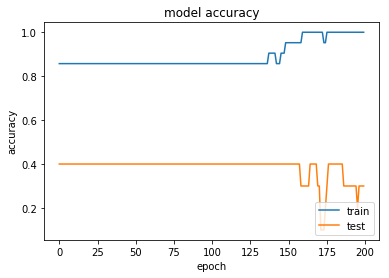

In [90]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

#### MODEL LOSS

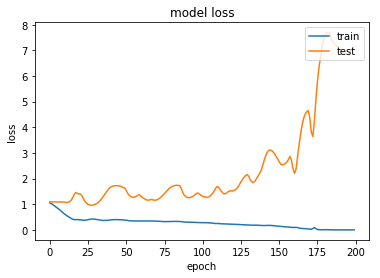

In [91]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()